# Basic Pytorch

In [41]:
import numpy as np
import torch
import torch.nn as nn

##  Linear Regression

In [42]:
linear = nn.Linear(1, 1)
print(linear.bias)
print(linear.weight)

Parameter containing:
tensor([-0.8625], requires_grad=True)
Parameter containing:
tensor([[0.4054]], requires_grad=True)


In [43]:
loss_fn = torch.nn.MSELoss()
loss = loss_fn(linear.weight,linear.bias)
loss

tensor(1.6077, grad_fn=<MseLossBackward0>)

In [44]:
optimum = torch.optim.SGD(linear.parameters(),lr=0.01)
optimum

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [45]:
data = np.genfromtxt('data.csv', delimiter=',')
x_data = torch.from_numpy(data[:,0:1]).float()
y_data = torch.from_numpy(data[:,1:]).float()
n = len(y_data)

epochs = 1000
losses = []
for i in range(epochs):
        
        y_hat = linear(x_data)
        loss = loss_fn(y_hat, y_data)  
        losses.append(loss.item())
        
        optimum.zero_grad()
        loss.backward() 
        optimum.step()
    

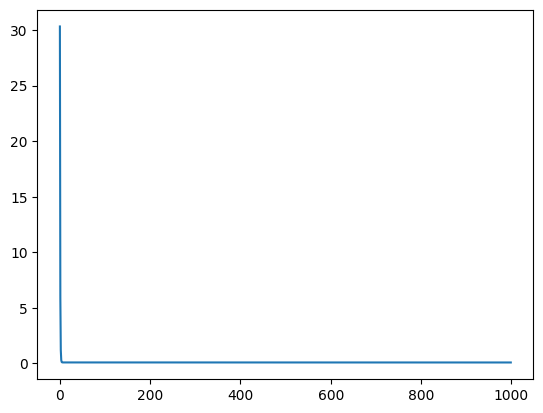

In [46]:
import matplotlib.pyplot as plt
plt.plot(losses)

## Logistic Regression

In [47]:
data = np.genfromtxt('iris_Petal_Logistic.csv', delimiter=',', skip_header=1)
x_data = torch.from_numpy(data[:,0:2])[:4]
y_data = torch.from_numpy(data[:,2])[:4]

print('X\n', x_data)
print('y\n', y_data)

X
 tensor([[1.4000, 0.2000],
        [1.4000, 0.2000],
        [1.3000, 0.2000],
        [1.5000, 0.2000]], dtype=torch.float64)
y
 tensor([0., 0., 0., 0.], dtype=torch.float64)


In [48]:
linear = nn.Linear(2,1)
print(linear.weight)
print(linear.bias)

Parameter containing:
tensor([[-0.2545,  0.4447]], requires_grad=True)
Parameter containing:
tensor([0.5734], requires_grad=True)


In [49]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(linear.parameters(),lr = 0.01) 
epochs = 5

In [50]:
#one sample
for i in range(epochs):
    for j in range(4):
        xi = x_data[j].float()
        yi = y_data[j:j+1].float()
        
        y_hat = torch.sigmoid(linear(xi))
        print(f'y_hat: {y_hat.item()}')
        loss = loss_fn(y_hat,yi)
        print(f'loss: {loss.item()}')
        optimizer.zero_grad()
        loss.backward()
        print(f'(db, dw): ({linear.bias.grad.data}, {linear.weight.grad.data})')
        optimizer.step()
        print(f'(b, w): ({linear.bias.data}, {linear.weight.data} \n\n')

y_hat: 0.5758987665176392
loss: 1.0219933986663818
(db, dw): (tensor([0.1563]), tensor([[0.2189, 0.0313]]))
(b, w): (tensor([0.5718]), tensor([[-0.2567,  0.4444]]) 


y_hat: 0.5747528672218323
loss: 1.0212600231170654
(db, dw): (tensor([0.1564]), tensor([[0.2189, 0.0313]]))
(b, w): (tensor([0.5703]), tensor([[-0.2589,  0.4441]]) 


y_hat: 0.5799261927604675
loss: 1.0245733261108398
(db, dw): (tensor([0.1562]), tensor([[0.2030, 0.0312]]))
(b, w): (tensor([0.5687]), tensor([[-0.2610,  0.4438]]) 


y_hat: 0.5661145448684692
loss: 1.0157413482666016
(db, dw): (tensor([0.1567]), tensor([[0.2350, 0.0313]]))
(b, w): (tensor([0.5671]), tensor([[-0.2633,  0.4435]]) 


y_hat: 0.5713084936141968
loss: 1.0190575122833252
(db, dw): (tensor([0.1565]), tensor([[0.2191, 0.0313]]))
(b, w): (tensor([0.5656]), tensor([[-0.2655,  0.4432]]) 


y_hat: 0.570158064365387
loss: 1.018322467803955
(db, dw): (tensor([0.1566]), tensor([[0.2192, 0.0313]]))
(b, w): (tensor([0.5640]), tensor([[-0.2677,  0.4429]]) 




In [51]:
data = np.genfromtxt('iris_Petal_Logistic.csv', delimiter=',', skip_header=1)
X = torch.from_numpy(data[:,0:2]).float()
Y = torch.from_numpy(data[:,2]).float().reshape(-1, 1)

print('X\n', X)
print('y\n', Y)

X
 tensor([[1.4000, 0.2000],
        [1.4000, 0.2000],
        [1.3000, 0.2000],
        [1.5000, 0.2000],
        [1.4000, 0.2000],
        [1.7000, 0.4000],
        [1.4000, 0.3000],
        [1.5000, 0.2000],
        [1.4000, 0.2000],
        [1.5000, 0.1000],
        [1.5000, 0.2000],
        [1.6000, 0.2000],
        [1.4000, 0.1000],
        [1.1000, 0.1000],
        [1.2000, 0.2000],
        [1.5000, 0.4000],
        [1.3000, 0.4000],
        [1.4000, 0.3000],
        [1.7000, 0.3000],
        [1.5000, 0.3000],
        [1.7000, 0.2000],
        [1.5000, 0.4000],
        [1.0000, 0.2000],
        [1.7000, 0.5000],
        [1.9000, 0.2000],
        [1.6000, 0.2000],
        [1.6000, 0.4000],
        [1.5000, 0.2000],
        [1.4000, 0.2000],
        [1.6000, 0.2000],
        [1.6000, 0.2000],
        [1.5000, 0.4000],
        [1.5000, 0.1000],
        [1.4000, 0.2000],
        [1.5000, 0.1000],
        [1.2000, 0.2000],
        [1.3000, 0.2000],
        [1.5000, 0.1000],
        [

In [52]:
linear = nn.Linear(2,1)
loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.SGD(linear.parameters(),lr = 0.01)
epochs = 10000

In [53]:
# train with all sample in data
losses = []
for i in range(epochs):
    y_hat = torch.sigmoid(linear(X))
    
    loss = loss_fn(y_hat,Y)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

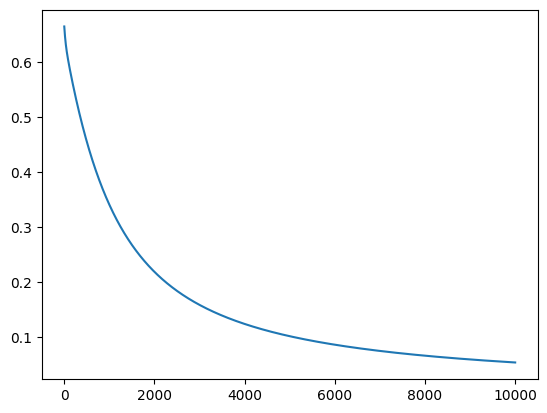

In [54]:
plt.plot(losses)

In [55]:
# compute accuracy 
z = linear(X)
y_hat = nn.Sigmoid()(z)

# compute accuracy using y and y_hat
y_hat_rounded = y_hat.round()
acc = (y_hat_rounded == Y).float().mean()
print(acc)

tensor(1.)


In [61]:
data = np.genfromtxt('iris_full.csv',delimiter=',',skip_header=1)
X = torch.from_numpy(data[:,0:4]).float()
y = torch.from_numpy(data[:,4:]).float()

print('X\n', X)
print('y\n', y)


X
 tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000],
        [5.4000, 3.9000, 1.7000, 0.4000],
        [4.6000, 3.4000, 1.4000, 0.3000],
        [5.0000, 3.4000, 1.5000, 0.2000],
        [4.4000, 2.9000, 1.4000, 0.2000],
        [4.9000, 3.1000, 1.5000, 0.1000],
        [5.4000, 3.7000, 1.5000, 0.2000],
        [4.8000, 3.4000, 1.6000, 0.2000],
        [4.8000, 3.0000, 1.4000, 0.1000],
        [4.3000, 3.0000, 1.1000, 0.1000],
        [5.8000, 4.0000, 1.2000, 0.2000],
        [5.7000, 4.4000, 1.5000, 0.4000],
        [5.4000, 3.9000, 1.3000, 0.4000],
        [5.1000, 3.5000, 1.4000, 0.3000],
        [5.7000, 3.8000, 1.7000, 0.3000],
        [5.1000, 3.8000, 1.5000, 0.3000],
        [5.4000, 3.4000, 1.7000, 0.2000],
        [5.1000, 3.7000, 1.5000, 0.4000],
        [4.6000, 3.6000, 1.0000, 0.2000],
        [5.1000, 3.3000, 1.7000

In [71]:
linear = nn.Linear(4,1)
loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.SGD(linear.parameters(),lr = 0.01)
epochs = 4000

In [72]:
losses = []
for i in range(epochs):
    y_hat = torch.sigmoid(linear(X))
    
    loss = loss_fn(y_hat,y)
    losses.append(loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

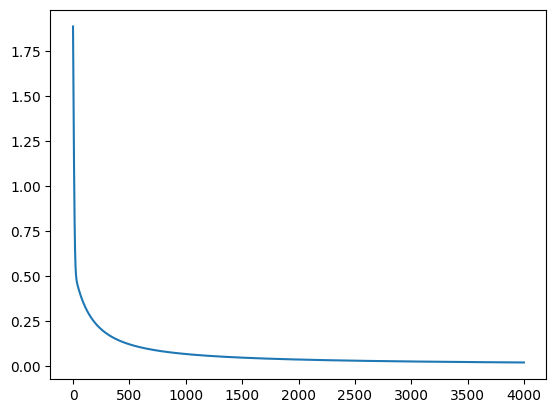

In [73]:
import matplotlib.pyplot as plt
plt.plot(losses)

In [74]:
# compute accuracy 
z = linear(X)
y_hat = nn.Sigmoid()(z)

# compute accuracy using y and y_hat
y_hat_rounded = y_hat.round()
acc = (y_hat_rounded == y).float().mean()
print(acc)

tensor(1.)


## Softmax Regression